In [1]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
def load_fashion_mnist():
    """
    Loads Fashion MNIST dataset.
    
    Adapted from: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
    """
    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'    
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    with gzip.open(TRAIN_LABELS, 'rb') as tr_labels_file, gzip.open(TEST_LABELS, 'rb') as ts_labels_file:
        train_labels = np.frombuffer(tr_labels_file.read(), dtype=np.uint8, offset=8)
        test_labels = np.frombuffer(ts_labels_file.read(), dtype=np.uint8, offset=8)

    with gzip.open(TRAIN_IMAGES, 'rb') as tr_images_file, gzip.open(TEST_IMAGES, 'rb') as ts_images_file:
        train_images = np.frombuffer(tr_images_file.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)
        test_images = np.frombuffer(ts_images_file.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

    return train_images, train_labels, test_images, test_labels

In [5]:
def pretty_print(image_example):
    """ Pretty prints a Fashion MNIST example.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))


In [2]:
def usage_example():
    """ Example of how to load and parse Fashion MNIST data. """
    
    train_images, train_labels, test_images, test_labels = load_fashion_mnist()

    # train_images is a 60,000 x 784 numpy matrix. There are 60k
    # rows in the matrix, each row corresponding to a single example.
    # There are 784 columns, each corresponding to the value of a
    # single pixel in the 28x28 image after it has been "flattened".
    print("Dimensions of training set feature matrix:", train_images.shape)
    #df = pd.DataFrame()
    #print(min(train_labels))
 

    # The labels for each example are maintained separately in train_labels.
    # This is a 60,000 x 1 numpy matrix, where each element is the label
    # for the corresponding training example.
    print("Dimensions of training set label matrix:", train_labels.shape)

    # Example of how to access a individual training example (in this case,
    # we pick an example at a random index). We could use print to output the
    # raw pixel values to the screen, but pretty_print formats the data in 
    # a nicer way: if you squint, you may be able to make out the contours of
    # the fashion article in the matrix data.
    EXAMPLE_INDEX = np.random.randint(60000)
    print("Features of training example at index {}:\n".format(EXAMPLE_INDEX))
    pretty_print(train_images[EXAMPLE_INDEX])

    # And here's the label that goes with that training example
    print("\nLabel of training example at index {}:".format(EXAMPLE_INDEX), train_labels[EXAMPLE_INDEX], '\n')

    # Finally, let's visualize the example we've picked as a 28x28 image
    plt.figure()
    plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
    plt.show()
    
    # The test_images/test_labels are organized in the same way, but only contain 10k
    # examples. Don't touch this data until your model is frozen! Perform all
    # cross-validation, model selection, hyperparameter tuning etc. on the 60k
    # training set. Use the test set simply for reporting performance.


Dimensions of training set feature matrix: (60000, 784)
Dimensions of training set label matrix: (60000,)
Features of training example at index 2632:

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

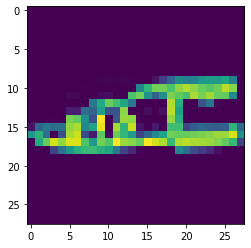

In [7]:
usage_example()

In [3]:
def summarize(y_test, y_pred, avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Test data count: ", len(y_test))
    print("accuracy_count: ", num_acc)
    print("accuracy_score: ", acc)
    print("precision_score: ", prec)
    print("recall_score", recall)

In [4]:
from sklearn.model_selection import train_test_split

train_images, train_labels, test_images, test_labels = load_fashion_mnist()
x_train, x_valid, train_labels, y_valid = train_test_split(train_images, train_labels, test_size=0.2)

train_images = x_train.astype('float32')
valid_images = x_valid.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
valid_images /= 255
test_images /= 255

print(train_images.shape)
print(valid_images.shape)
print(test_images.shape)

(48000, 784)
(12000, 784)
(10000, 784)


In [48]:
logisticRegr = LogisticRegression(max_iter=2000)
logisticRegr.fit(train_images, train_labels)
predictions = logisticRegr.predict(valid_images)

print(predictions)
summarize(y_valid,predictions)

[3 7 9 ... 2 0 5]
Test data count:  12000
accuracy_count:  10206
accuracy_score:  0.8505
precision_score:  0.8501570951171465
recall_score 0.8505


In [5]:

from sklearn.decomposition import PCA

# with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784)
# , and there was significant loss of information (quality) in the 'recovered' (decompressed) images.
# Hence, I have selected n_components=0.99, which gives 458 features (out of original 784) 
# and there is no significant loss of information (quality) in the 'recovered' images 

pca = PCA(n_components=0.99)

X_train_reduced = pca.fit_transform(train_images)



pca.n_components_


458

In [6]:
X_train_recovered = pca.inverse_transform(X_train_reduced)

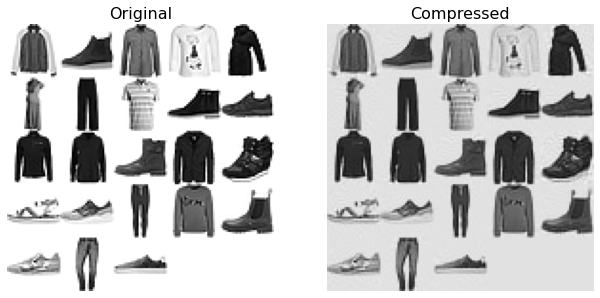

In [11]:

import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")


plt.subplot(121)
# Plotting 'original' image
plot_digits(train_images[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
N = 1.75
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
plt.show()




In [ ]:
lr = LogisticRegression( C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1800, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)
lr.fit(X_train_reduced, train_labels)
X_valid_reduced = pca.transform(valid_images)
predict_y = lr.predict(X_valid_reduced)
print(predict_y)
summarize(y_valid, predict_y)

/opt/conda/envs/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
logisticRegr = LogisticRegression(max_iter=1800,solver='saga',penalty='l1')
logisticRegr.fit(X_train_reduced, train_labels)
X_valid_reduced = pca.transform(valid_images)
predictions = logisticRegr.predict(X_valid_reduced)

print(predictions)


In [116]:
summarize(y_valid,predictions)

Test data count:  12000
accuracy_count:  10301
accuracy_score:  0.8584166666666667
precision_score:  0.8576046058538642
recall_score 0.8584166666666667


In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, class_, title='Confusion matrix', cmap=plt.cm.viridis):
    """
    This function plots a confusion matrix
    """
    
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)
    plt.colorbar()
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    N = 1.75
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
    plt.show()

In [8]:
fashion_classes     = {0: 'T-shirt/top', 
                       1: 'Trouser', 
                       2: 'Pullover', 
                       3: 'Dress', 
                       4: 'Coat',
                       5: 'Sandal', 
                       6: 'Shirt', 
                       7: 'Sneaker', 
                       8: 'Bag', 
                       9: 'Ankle boot'}

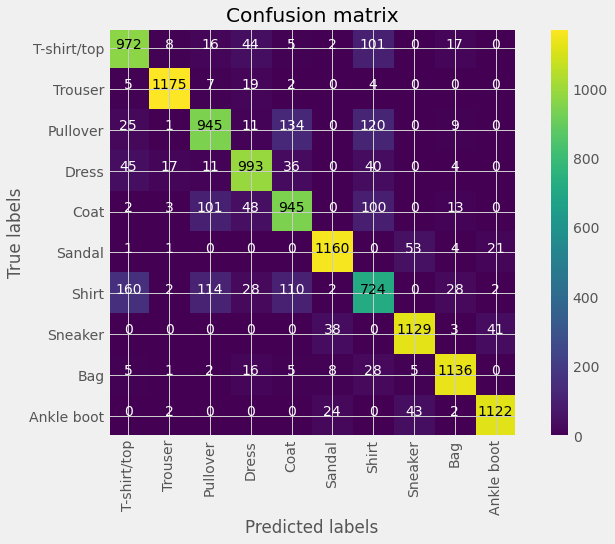

In [223]:
plot_confusion_matrix(confusion_matrix(y_valid, predictions), list(fashion_classes.values()))

In [32]:
logisticRegr = LogisticRegression(max_iter=1800, solver='sag')
logisticRegr.fit(X_train_reduced, train_labels)
X_valid_reduced = pca.transform(valid_images)
predictions = logisticRegr.predict(X_valid_reduced)

print(predictions)



[4 6 1 ... 5 1 3]


/opt/conda/envs/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [33]:
summarize(y_valid,predictions)

Test data count:  12000
accuracy_count:  10309
accuracy_score:  0.8590833333333333
precision_score:  0.8575182567779429
recall_score 0.8590833333333333


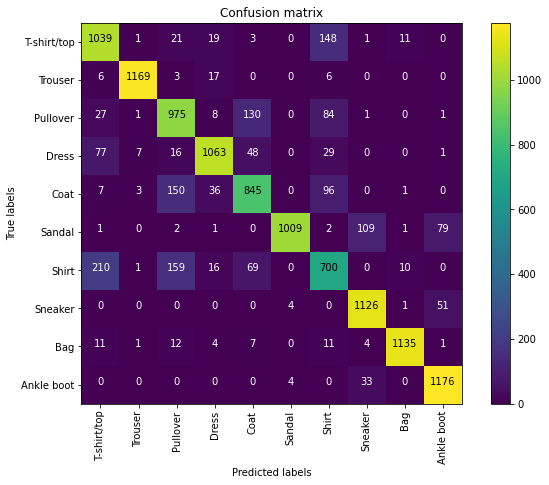

Test data count:  12000
accuracy_count:  10237
accuracy_score:  0.8530833333333333
precision_score:  0.8560288944293977
recall_score 0.8530833333333333


In [20]:
from sklearn.neighbors import KNeighborsClassifier
X_valid_reduced = pca.transform(valid_images)
KNN_model_type_3 = KNeighborsClassifier(n_neighbors=3).fit(X_train_reduced, train_labels)
prediction = KNN_model_type_3.predict(X_valid_reduced)
plot_confusion_matrix(confusion_matrix(y_valid, prediction), list(fashion_classes.values()))
summarize(y_valid,prediction)


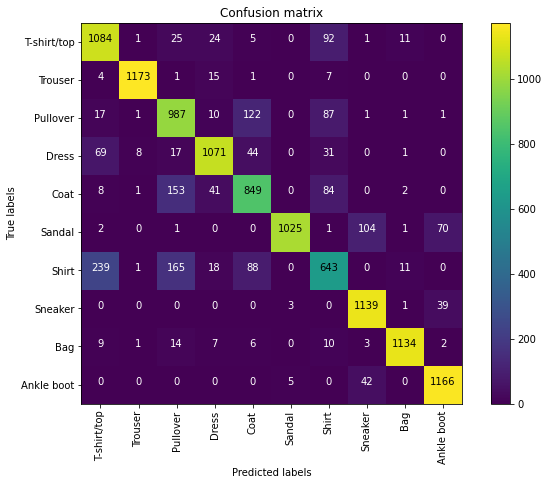

Test data count:  12000
accuracy_count:  10271
accuracy_score:  0.8559166666666667
precision_score:  0.8576076052338996
recall_score 0.8559166666666667


In [21]:
from sklearn.neighbors import KNeighborsClassifier
X_valid_reduced = pca.transform(valid_images)
KNN_model_type_4 = KNeighborsClassifier(n_neighbors=4).fit(X_train_reduced, train_labels)
prediction = KNN_model_type_4.predict(X_valid_reduced)
plot_confusion_matrix(confusion_matrix(y_valid, prediction), list(fashion_classes.values()))
summarize(y_valid,prediction)

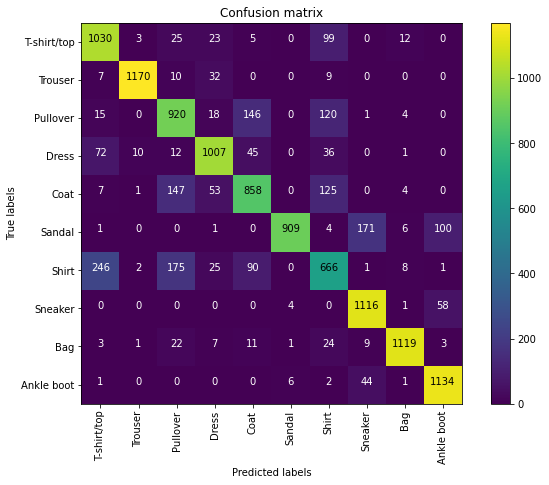

Test data count:  12000
accuracy_count:  9929
accuracy_score:  0.8274166666666667
precision_score:  0.8312791166438104
recall_score 0.8274166666666667


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
X_valid_reduced = pca.transform(valid_images)
KNN_model_type_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train_reduced, train_labels)
prediction = cross_val_predict(KNN_model_type_5, X_valid_reduced, y_valid, cv=10)
plot_confusion_matrix(confusion_matrix(y_valid, prediction), list(fashion_classes.values()))
summarize(y_valid,prediction)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
acc_list = []
f1_score1 = []

for i in range(1, 50):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    
    knn_clf.fit(X_train_reduced, train_labels)
    
    X_valid_reduced = pca.transform(valid_images)
    
    prediction = knn_clf.predict(X_valid_reduced)
    
    accuracy = accuracy_score(y_valid, prediction)
    
    f1 = f1_score(y_valid, prediction, average='micro')
    
    f1_score1.append((f1,i)) 
    
    acc_list.append(accuracy)

0.8574166666666667 (0.8574166666666667, 6)


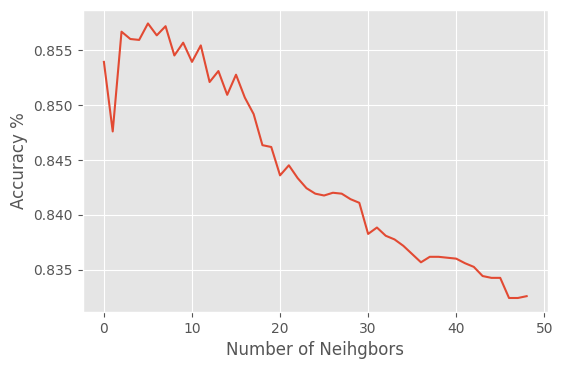

In [31]:
num_k = np.arange(49)
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.plot(num_k, acc_list)
plt.xlabel('Number of Neihgbors')
plt.ylabel('Accuracy %')
plt.savefig('acc_plot.png')
print(max(acc_list), max(f1_score1))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
acc_list = []
for i in range(1,2):
    knn_clf = KNeighborsClassifier(n_neighbors=i, p=1)
    
    knn_clf.fit(X_train_reduced, train_labels)
    
    X_valid_reduced = pca.transform(valid_images)
    
    prediction = knn_clf.predict(X_valid_reduced)
    
    accuracy = accuracy_score(y_valid, prediction)
    
    acc_list.append(accuracy)

[0.8446666666666667]


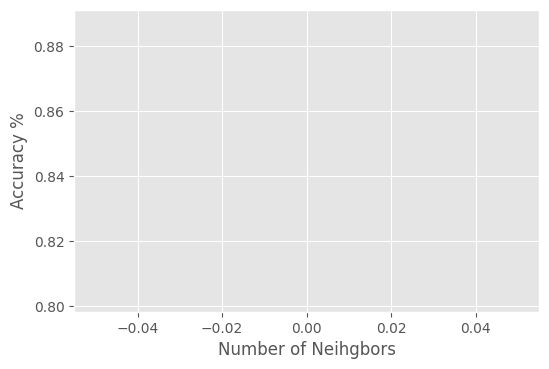

In [13]:
num_k = np.arange(1)
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.plot(num_k, acc_list)
plt.xlabel('Number of Neihgbors')
plt.ylabel('Accuracy %')
plt.savefig('acc_plot.png')
print(acc_list)